In [ ]:
# conda activate aso_design
import pandas as pd
from scripts.data_genertion.consts import *
from asodesigner.file_utils import read_human_genome_fasta_dict
from asodesigner.consts import *
all_data = pd.read_csv(DATA_PATH / 'data_from_article_fixed.csv')


In [3]:
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
def print_correlations(df, name1, name2, p_value_threshold=None):
    if p_value_threshold is None:
        p_value_threshold = 1
    corr, p_value = pearsonr(df[name1], df[name2])
    if p_value < p_value_threshold:
        print(f"Feature: {name1:<35}, Pearson: {corr:<5.2f}, p-value: {p_value:<10.2} Target: {name2:<35}")
    corr, p_value = spearmanr(df[name1], df[name2])
    if p_value < p_value_threshold:
        print(f"Feature: {name1:<35}, Spearman: {corr:<5.2f}, p-value: {p_value:<10.2} Target: {name2:<35}")

        # MIC (via Mutual Information)
    try:
        mic = mutual_info_regression(df[[name1]], df[name2], discrete_features='auto')[0]
        print(f"Feature: {name1:<35}, MIC:      {mic:<5.2f}                             Target: {name2:<35}")
    except Exception as e:
        print(f"Could not compute MIC for {name1} vs {name2}: {e}")    

Feture generation

In [4]:
# purine content
from asodesigner.features.seq_features import purine_content
from Bio.Seq import Seq

all_data['purine_content'] = all_data["Sequence"].apply(lambda x: purine_content(x))
sequence_features = ['purine_content']

In [5]:
# count_g_runs
from asodesigner.features.seq_features import count_g_runs
all_data['ggg_counts'] = all_data["Sequence"].apply(lambda x: count_g_runs(x))
#sequence_features.append("ggg_counts")

In [6]:
#ENC
from asodesigner.features.seq_features import compute_ENC
all_data["ENC"] = all_data["Sequence"].apply(lambda x: compute_ENC(x))
sequence_features.append("ENC")

In [7]:
# palindromic count of 4 and 6 palindroms
from asodesigner.features.seq_features import palindromic_fraction
all_data['4 palindromic'] = all_data[SEQUENCE].apply(lambda x: palindromic_fraction(x,4))
sequence_features.append("4 palindromic")

all_data['6 palindromic'] = all_data[SEQUENCE].apply(lambda x: palindromic_fraction(x,6))
sequence_features.append("6 palindromic")


In [8]:
# entropy
from asodesigner.features.seq_features import seq_entropy
all_data["entropy"] = all_data["Sequence"].apply(lambda x: seq_entropy(x))
sequence_features.append("entropy")

In [9]:
#hairpin_score
from asodesigner.features.seq_features import hairpin_score
all_data["hairpin_score"] = all_data["Sequence"].apply(lambda x : hairpin_score(x))
sequence_features.append("hairpin_score")

In [10]:
#toxic_motif_count
from asodesigner.features.seq_features import toxic_motif_count
all_data["toxic_motif_count"] = all_data["Sequence"].apply(lambda x : toxic_motif_count(x))
sequence_features.append("toxic_motif_count")

In [11]:
# hairpin_dG_energy
from asodesigner.features.seq_features import hairpin_dG_energy
all_data["hairpin_dG_energy"] = all_data["Sequence"].apply(lambda x : hairpin_dG_energy(x))
sequence_features.append("hairpin_dG_energy")

structure_found: False
structure_found: False
structure_found: False
structure_found: True
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: True
structure_found: True
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: True
structure_found: True
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found: False
structure_found:

In [12]:
#hairpin_tm
from asodesigner.features.seq_features import hairpin_tm
all_data["hairpin_tm"] = all_data["Sequence"].apply(lambda x : hairpin_tm(x))
sequence_features.append("hairpin_tm")


In [13]:
#tandem_repeats_score
from asodesigner.features.seq_features import tandem_repeats_score
all_data["tandem_repeats_score"] = all_data["Sequence"].apply(lambda x : tandem_repeats_score(x))
sequence_features.append("tandem_repeats_score")

In [14]:
# dispersed_repeats_score
from asodesigner.features.seq_features import dispersed_repeats_score
all_data["dispersed_repeats_score"] = all_data["Sequence"].apply(lambda x : dispersed_repeats_score(x))
sequence_features.append("dispersed_repeats_score")


In [15]:
#flexible_dinucleotide_fraction
from asodesigner.features.seq_features import flexible_dinucleotide_fraction
all_data["flexible_dinucleotide_fraction"] = all_data["Sequence"].apply(lambda x : flexible_dinucleotide_fraction(x))
sequence_features.append("flexible_dinucleotide_fraction")

In [16]:
#gc_skew
from asodesigner.features.seq_features import gc_skew
all_data["gc_skew"] = all_data["Sequence"].apply(lambda x : gc_skew(x))
sequence_features.append("gc_skew")

In [17]:
#gc_skew_ends
from asodesigner.features.seq_features import gc_skew_ends
all_data["gc_skew_ends"] = all_data["Sequence"].apply(lambda x : gc_skew_ends(x))
sequence_features.append("gc_skew_ends")

In [18]:
#at_skew
from asodesigner.features.seq_features import at_skew
all_data["at_skew"] = all_data["Sequence"].apply(lambda x : at_skew(x))
sequence_features.append("at_skew")

In [19]:
#stop_codon_count
from asodesigner.features.seq_features import stop_codon_count
all_data["stop_codon_count"] = all_data["Sequence"].apply(lambda x : stop_codon_count(x))
sequence_features.append("stop_codon_count")

In [20]:
#nucleotide_diversity
from asodesigner.features.seq_features import nucleotide_diversity
all_data["nucleotide_diversity"] = all_data["Sequence"].apply(lambda x : nucleotide_diversity(x))
sequence_features.append("nucleotide_diversity")

In [21]:
#cg_dinucleotide_fraction
import importlib
#import niv_features
#importlib.reload(niv_features)
from asodesigner.features.seq_features import cg_dinucleotide_fraction
all_data["cg_dinucleotide_fraction"] = all_data["Sequence"].apply(lambda x : cg_dinucleotide_fraction(x))
sequence_features.append("cg_dinucleotide_fraction")

In [22]:
#poly_pyrimidine_stretch
from asodesigner.features.seq_features import poly_pyrimidine_stretch
all_data["poly_pyrimidine_stretch"] = all_data["Sequence"].apply(lambda x : poly_pyrimidine_stretch(x))
sequence_features.append("poly_pyrimidine_stretch")

In [23]:
#dinucleotide_entropy
from asodesigner.features.seq_features import dinucleotide_entropy
all_data["dinucleotide_entropy"] = all_data["Sequence"].apply(lambda x : dinucleotide_entropy(x))
sequence_features.append("dinucleotide_entropy")

In [24]:
#gc_block_length
from asodesigner.features.seq_features import gc_block_length
all_data["gc_block_length"] = all_data["Sequence"].apply(lambda x : gc_block_length(x))
sequence_features.append("gc_block_length")

In [25]:
#at_rich_region_score
from asodesigner.features.seq_features import at_rich_region_score
all_data["at_rich_region_score"] = all_data["Sequence"].apply(lambda x : at_rich_region_score(x))
sequence_features.append("at_rich_region_score")

In [26]:
import numpy as np

all_data_no_nan = all_data.dropna(subset=[INHIBITION]).copy()
all_data_no_nan.loc[:, 'log_inhibition'] = -np.log(-all_data_no_nan[INHIBITION] + 100.001)

In [27]:
all_data_no_nan_human = all_data_no_nan[all_data_no_nan[CELL_LINE_ORGANISM] == 'human']
genes = all_data_no_nan[CANONICAL_GENE].copy()
genes_u = list(set(genes))
genes_u.remove('HBV')
genes_u.remove('negative_control')

In [28]:
from asodesigner.read_human_genome import get_locus_to_data_dict
import pickle
from asodesigner.consts import CACHE_DIR


cache_path = CACHE_DIR / 'gene_to_data_simple_cache.pickle'
if not cache_path.exists():
    gene_to_data = get_locus_to_data_dict(include_introns=True, gene_subset=genes_u)
    with open(cache_path, 'wb') as f:
        pickle.dump(gene_to_data, f)
else:
    with open(cache_path, 'rb') as f:
        gene_to_data = pickle.load(f)

In [29]:
from asodesigner.util import get_antisense

all_data_human_gene = all_data_no_nan_human[all_data_no_nan_human[CANONICAL_GENE].isin(genes_u)].copy()
PREMRNA_FOUND = 'pre_mrna_found'
SENSE_START = 'sense_start'
SENSE_LENGTH = 'sense_length'
SENSE_TYPE = 'sense_type'

found = 0
not_found = 0
all_data_human_gene[SENSE_START] = np.zeros_like(all_data_human_gene[CANONICAL_GENE], dtype=int)
all_data_human_gene[SENSE_LENGTH] = np.zeros_like(all_data_human_gene[CANONICAL_GENE], dtype=int)
all_data_human_gene[SENSE_TYPE] = "NA"
for index, row in all_data_human_gene.iterrows():
     gene_name = row[CANONICAL_GENE]
     locus_info = gene_to_data[gene_name]
     pre_mrna = locus_info.full_mrna
     antisense = row[SEQUENCE]
     sense = get_antisense(antisense)
     idx = pre_mrna.find(sense)
     all_data_human_gene.loc[index, SENSE_START] = idx
     all_data_human_gene.loc[index, SENSE_LENGTH] = len(antisense)
     if idx != -1:
         genome_corrected_index = idx + locus_info.exon_indices[0][0]
         found = False
         for exon_indices in locus_info.exon_indices:
            # print(exon[0], exon[1])
            if exon_indices[0] <=  genome_corrected_index <= exon_indices[1]:
                all_data_human_gene.loc[index, SENSE_TYPE] = 'exon'
                found = True
                break
     if not found:
         all_data_human_gene.loc[index, SENSE_TYPE] = 'intron'

In [30]:
# Filter genes that were not found in genome
all_data_human_gene_premrna = all_data_human_gene[all_data_human_gene[SENSE_START] != -1]
len(all_data_human_gene_premrna)

29987

In [31]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.metrics import make_scorer
import pandas as pd
from scripts.data_genertion.consts import *

In [32]:
all_data_human_gene_premrna_no_nan = all_data_human_gene_premrna.copy()
filtered = all_data_human_gene_premrna_no_nan
filtered = filtered[filtered['Cell line organism'] == 'human']
filtered = filtered[filtered['Cell line organism'] == 'human']
print(len(filtered))
filtered = filtered.dropna(subset=[INHIBITION]).copy()
filtered = filtered.dropna(subset=[DENSITY]).copy()

ONE_HOT_FEATURE_NAMES = [CELL_LINE, TRANSFECTION, MODIFICATION, SENSE_TYPE]
# append more one-hot features 'first_nucleotide', 'second_nucleotide'

for one_hot_feature in ONE_HOT_FEATURE_NAMES:
    filtered = pd.get_dummies(filtered, columns=[one_hot_feature]).copy()

filtered.loc[:, 'log_volume'] = np.log(filtered[VOLUME])
filtered.loc[:, 'log_density'] = np.log(filtered[DENSITY])

# more feature generation
feature_base = [SENSE_START, SENSE_LENGTH]
experiment_features = [VOLUME, 'log_volume', 'log_density', TREATMENT_PERIOD]

one_hot_encoded_features = []
for one_hot_feature in ONE_HOT_FEATURE_NAMES:
    one_hot_encoded_features.append([feature for feature in filtered.columns if one_hot_feature in feature and one_hot_feature != feature])

# Flatten the list of list to a single big list
flat_one_hot_encoded_features = [feature for sublist in one_hot_encoded_features for feature in sublist]

features = feature_base + experiment_features + flat_one_hot_encoded_features + sequence_features



29987


spliting the data to validation, train and test sets

In [33]:
train, test = train_test_split(filtered, test_size=0.2)
X = train[features]
Y = train['log_inhibition']
X_val = test[features]
y_val = test['log_inhibition']
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


In [34]:
model = LinearRegression()
model.fit(X[features], train['log_inhibition'])

baseline_score = cross_val_score(model, X, Y, cv=5).mean()

def spearman_score(y_true, y_pred):
    return stats.spearmanr(y_true, y_pred).correlation ** 2

spearman_scorer = make_scorer(spearman_score, greater_is_better=True)
spearman_score = cross_val_score(model, X, Y, cv=5, scoring=spearman_scorer, n_jobs=-1).mean()

print(f"Baseline score: {baseline_score}")
print("Spearman score: ", spearman_score)

Baseline score: 0.3837193338989153
Spearman score:  0.37292462571945845


Test Niv features

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

Feature: purine_content                     , Pearson: -0.07, p-value: 1.8e-30    Target: log_inhibition                     
Feature: purine_content                     , Spearman: -0.06, p-value: 9e-21      Target: log_inhibition                     
Feature: purine_content                     , MIC:      0.05                              Target: log_inhibition                     
Feature: purine_content                     , Pearson: -0.06, p-value: 9.6e-22    Target: Inhibition(%)                      
Feature: purine_content                     , Spearman: -0.06, p-value: 9e-21      Target: Inhibition(%)                      
Feature: purine_content                     , MIC:      0.05                              Target: Inhibition(%)                      


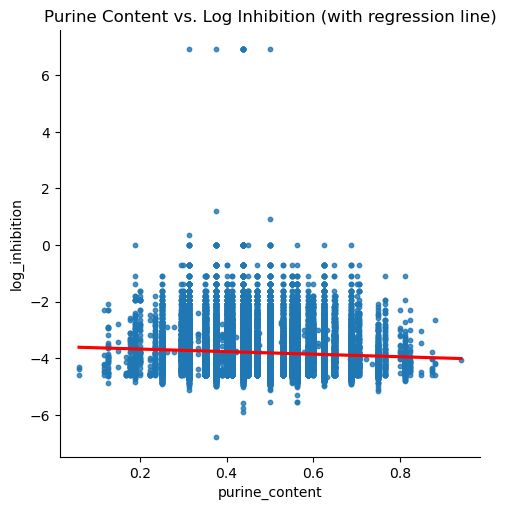

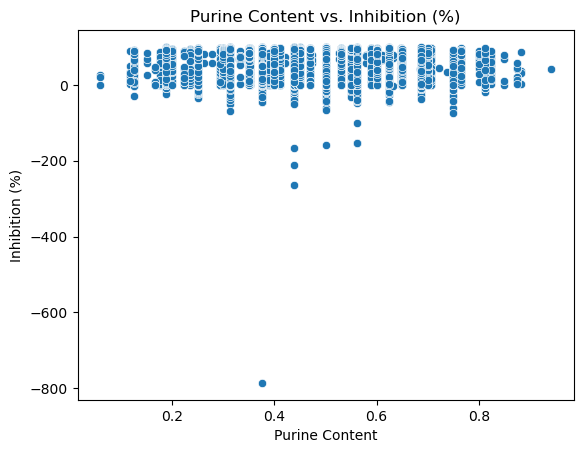

In [36]:
# Test purine content behavior 
print_correlations(filtered, 'purine_content', 'log_inhibition')
print_correlations(filtered, 'purine_content', INHIBITION)  

sns.lmplot(data=filtered, x='purine_content', y='log_inhibition', scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('Purine Content vs. Log Inhibition (with regression line)')
plt.show()

sns.scatterplot(data=filtered, x='purine_content', y=INHIBITION)
plt.title('Purine Content vs. Inhibition (%)')
plt.xlabel('Purine Content')
plt.ylabel('Inhibition (%)')
plt.show()

Feature: ggg_counts                         , Pearson: -0.01, p-value: 0.22       Target: log_inhibition                     
Feature: ggg_counts                         , Spearman: -0.01, p-value: 0.15       Target: log_inhibition                     
Feature: ggg_counts                         , MIC:      0.00                              Target: log_inhibition                     
Feature: ggg_counts                         , Pearson: -0.01, p-value: 0.2        Target: Inhibition(%)                      
Feature: ggg_counts                         , Spearman: -0.01, p-value: 0.15       Target: Inhibition(%)                      
Feature: ggg_counts                         , MIC:      0.00                              Target: Inhibition(%)                      


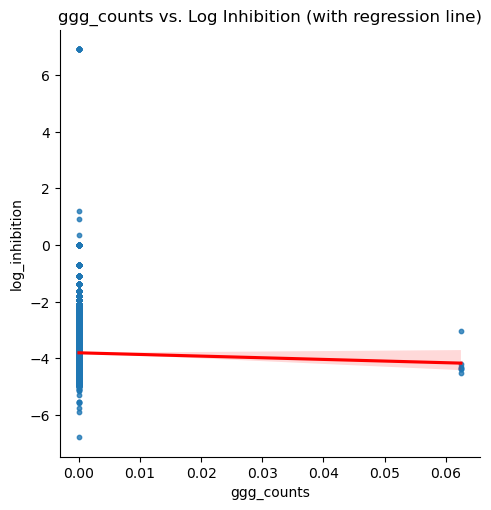

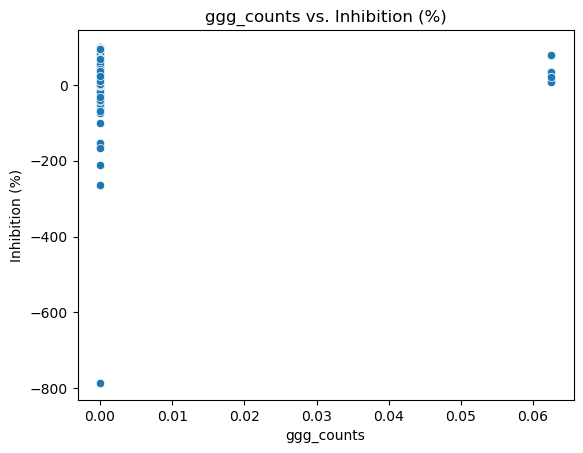

In [37]:
# Test GGG count behavior
print_correlations(filtered,"ggg_counts","log_inhibition")
print_correlations(filtered, 'ggg_counts', INHIBITION)  

sns.lmplot(data=filtered, x='ggg_counts', y='log_inhibition', scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('ggg_counts vs. Log Inhibition (with regression line)')
plt.show()

sns.scatterplot(data=filtered, x='ggg_counts', y=INHIBITION)
plt.title('ggg_counts vs. Inhibition (%)')
plt.xlabel('ggg_counts')
plt.ylabel('Inhibition (%)')
plt.show()


Feature: ENC                                , Pearson: -0.00, p-value: 0.85       Target: log_inhibition                     
Feature: ENC                                , Spearman: 0.03 , p-value: 1.8e-05    Target: log_inhibition                     
Feature: ENC                                , MIC:      0.09                              Target: log_inhibition                     
Feature: ENC                                , Pearson: 0.03 , p-value: 2.9e-05    Target: Inhibition(%)                      
Feature: ENC                                , Spearman: 0.03 , p-value: 1.8e-05    Target: Inhibition(%)                      
Feature: ENC                                , MIC:      0.08                              Target: Inhibition(%)                      


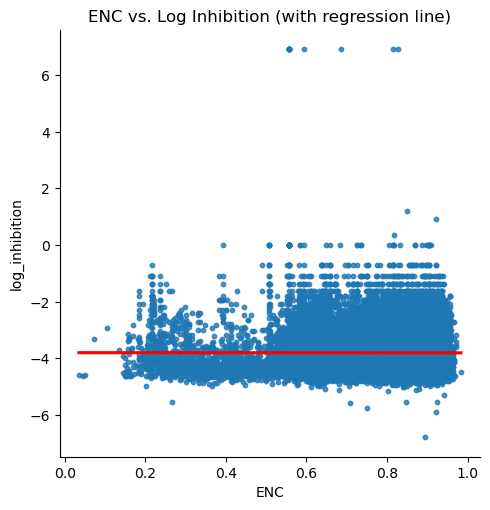

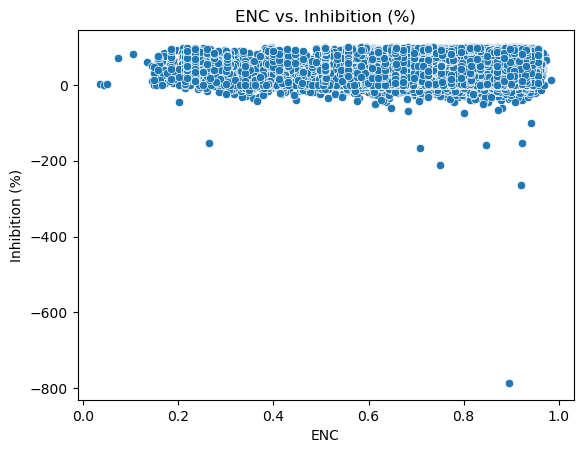

In [38]:
# Test ENC behavior
print_correlations(filtered,"ENC","log_inhibition")
print_correlations(filtered, 'ENC', INHIBITION)  

sns.lmplot(data=filtered, x='ENC', y='log_inhibition', scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('ENC vs. Log Inhibition (with regression line)')
plt.show()

sns.scatterplot(data=filtered, x='ENC', y=INHIBITION)
plt.title('ENC vs. Inhibition (%)')
plt.xlabel('ENC')
plt.ylabel('Inhibition (%)')
plt.show()

Features Importence test

In [39]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

rf = RandomForestRegressor(random_state=42)
rf.fit(filtered[features], filtered['log_inhibition'])

# Get feature importances
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


for index, row in importance_df.iterrows():
    print(f"{row['Feature']:<35} {row['Importance']:.4f}")


sense_start                         0.1817
Treatment_Period(hours)             0.1287
ASO_volume(nM)                      0.0910
log_volume                          0.0818
at_skew                             0.0619
log_density                         0.0560
ENC                                 0.0368
gc_skew                             0.0357
Cell_line_A431                      0.0280
dispersed_repeats_score             0.0212
flexible_dinucleotide_fraction      0.0203
entropy                             0.0202
dinucleotide_entropy                0.0196
gc_skew_ends                        0.0194
Transfection_free uptake            0.0153
purine_content                      0.0145
gc_block_length                     0.0138
hairpin_tm                          0.0128
hairpin_dG_energy                   0.0123
Modification_MOE/cEt/5-methylcytosines/deoxy 0.0119
tandem_repeats_score                0.0119
hairpin_score                       0.0118
Modification_cEt/5-methylcytosines/deoxy 0.01

In [40]:
import pandas as pd

# Create the importance DataFrame directly from the model
importance_df = pd.DataFrame({
    'Feature': rf.feature_names_in_,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Define keyword-based categories
sequence_keywords = ['gc', 'entropy', 'ENC', 'skew', 'repeat', 'hairpin', 'palindromic', 'purine', 'at_skew', 'dinucleotide', 'stop_codon', 'ggg']
experimental_keywords = ['volume', 'density', 'Transfection', 'Treatment']
meta_keywords = ['sense_', 'Modification', 'Cell_line']

# Auto-assign categories
def categorize_feature(feature):
    f = feature.lower()
    if any(k in f for k in sequence_keywords):
        return 'sequence'
    elif any(k in f for k in experimental_keywords):
        return 'experimental'
    elif any(k in f for k in meta_keywords):
        return 'meta'
    else:
        return 'other'

importance_df['Category'] = importance_df['Feature'].apply(categorize_feature)
importance_df['Importance'] = importance_df['Importance'].round(4)

# Display the result
display(importance_df)

,Feature,Importance,Category
0,sense_start,0.1817,meta
5,Treatment_Period(hours),0.1287,other
2,ASO_volume(nM),0.0910,experimental
3,log_volume,0.0818,experimental
48,at_skew,0.0619,sequence
4,log_density,0.0560,experimental
35,ENC,0.0368,other
46,gc_skew,0.0357,sequence
7,Cell_line_A431,0.0280,other
44,dispersed_repeats_score,0.0212,sequence


models

=== Random Forest ===
Train MAE:     0.152
Validation MAE:0.307
Train Pearson: 0.949
Val Pearson:   0.810
Train Spearman:0.957
Val Spearman:  0.807
Top features:
sense_start                0.161920
Treatment_Period(hours)    0.125836
log_volume                 0.083938
ASO_volume(nM)             0.082828
at_skew                    0.081574
log_density                0.055169
ENC                        0.039114
gc_skew                    0.034830
Cell_line_A431             0.025245
entropy                    0.021821
dtype: float64


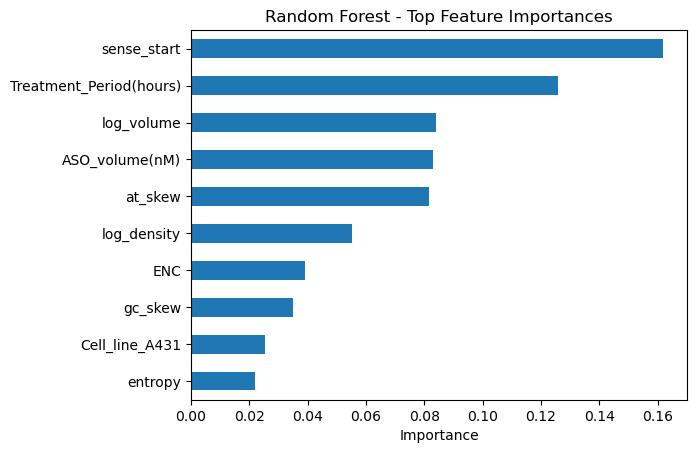

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import pandas as pd

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

train_pred = rf.predict(X_train)
val_pred = rf.predict(X_val)

print("=== Random Forest ===")
print(f"Train MAE:     {mean_absolute_error(y_train, train_pred):.3f}")
print(f"Validation MAE:{mean_absolute_error(y_val, val_pred):.3f}")
print(f"Train Pearson: {pearsonr(y_train, train_pred)[0]:.3f}")
print(f"Val Pearson:   {pearsonr(y_val, val_pred)[0]:.3f}")
print(f"Train Spearman:{spearmanr(y_train, train_pred)[0]:.3f}")
print(f"Val Spearman:  {spearmanr(y_val, val_pred)[0]:.3f}")

rf_importance = pd.Series(rf.feature_importances_, index=X.columns)
top_rf = rf_importance.sort_values(ascending=False).head(10)
print("Top features:")
print(top_rf)

top_rf.plot(kind='barh')
plt.title("Random Forest - Top Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


/home/nivd1/miniconda3/envs/aso_design/lib/python3.11/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


=== XGBoost ===
Train MAE:     0.237
Validation MAE:0.314
Train Pearson: 0.902
Val Pearson:   0.806
Train Spearman:0.885
Val Spearman:  0.786
Top features:
Treatment_Period(hours)                     0.166396
Cell_line_A431                              0.103848
Cell_line_U251                              0.097376
Transfection_free uptake                    0.093413
log_density                                 0.041387
Cell_line_SNU-449                           0.040263
ASO_volume(nM)                              0.037713
Modification_MOE/5-methylcytosines/deoxy    0.032909
Cell_line_KMS11                             0.032767
at_skew                                     0.022354
dtype: float32


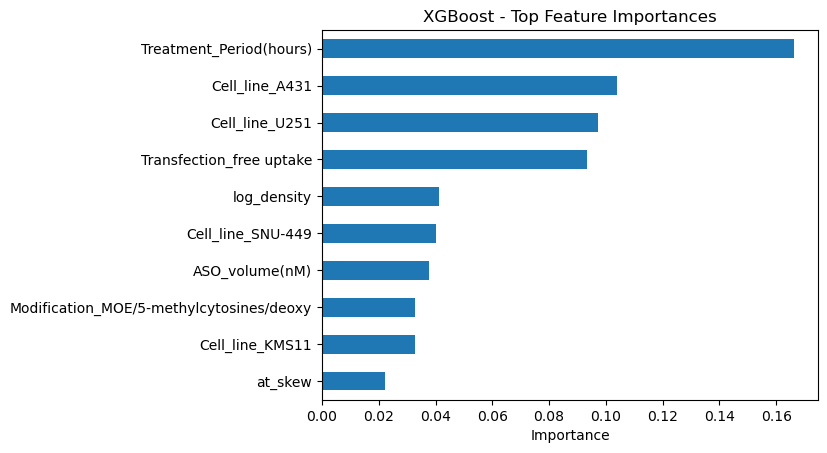

In [42]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

train_pred = xgb.predict(X_train)
val_pred = xgb.predict(X_val)

print("=== XGBoost ===")
print(f"Train MAE:     {mean_absolute_error(y_train, train_pred):.3f}")
print(f"Validation MAE:{mean_absolute_error(y_val, val_pred):.3f}")
print(f"Train Pearson: {pearsonr(y_train, train_pred)[0]:.3f}")
print(f"Val Pearson:   {pearsonr(y_val, val_pred)[0]:.3f}")
print(f"Train Spearman:{spearmanr(y_train, train_pred)[0]:.3f}")
print(f"Val Spearman:  {spearmanr(y_val, val_pred)[0]:.3f}")

xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns)
top_xgb = xgb_importance.sort_values(ascending=False).head(10)
print("Top features:")
print(top_xgb)

top_xgb.plot(kind='barh')
plt.title("XGBoost - Top Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

train_pred = lr.predict(X_train)
val_pred = lr.predict(X_val)

print("=== Linear Regression ===")
print(f"Train MAE:     {mean_absolute_error(y_train, train_pred):.3f}")
print(f"Validation MAE:{mean_absolute_error(y_val, val_pred):.3f}")
print(f"Train Pearson: {pearsonr(y_train, train_pred)[0]:.3f}")
print(f"Val Pearson:   {pearsonr(y_val, val_pred)[0]:.3f}")
print(f"Train Spearman:{spearmanr(y_train, train_pred)[0]:.3f}")
print(f"Val Spearman:  {spearmanr(y_val, val_pred)[0]:.3f}")

=== Linear Regression ===
Train MAE:     0.436
Validation MAE:0.436
Train Pearson: 0.622
Val Pearson:   0.621
Train Spearman:0.615
Val Spearman:  0.607


try to find the best hyperparameters

In [ ]:
#RF by MSE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Reduced parameter grid to prevent memory overload
param_grid = {
    'n_estimators': [100],          # Fixed number of trees (safe)
    'max_depth': [5, 10],           # Reasonable depth limits
    'min_samples_split': [2, 5]     # Only two options to test
}

# GridSearch setup
grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Optimize for MAE
    cv=5,                                # 5-fold CV
    n_jobs=-1,                           # Use all cores
    verbose=2                            # Print progress
)

# Fit grid search on training set
grid_rf.fit(X_train, y_train)

# Print best configuration and its score
print("Best Parameters:", grid_rf.best_params_)
print("Best Validation MAE:", -grid_rf.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=  26.1s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=  26.3s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=  26.5s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=  26.8s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=  27.1s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=  27.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=  27.6s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=  31.3s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=  26.4s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=  28.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  45.1s
[CV] END max_depth=10, min_samples_split=2, n_est

In [ ]:
#RF by spearman
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer

# Custom scorer for Spearman correlation
def spearman_score(y_true, y_pred):
    return spearmanr(y_true, y_pred).correlation

# Create a scorer object (greater_is_better=True → maximize score)
spearman_scorer = make_scorer(spearman_score, greater_is_better=True)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Smaller grid for safety
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

# Grid search using Spearman scorer
grid_rf_spearman = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring=spearman_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_rf_spearman.fit(X_train, y_train)

# Output best result
print("Best parameters (Spearman):", grid_rf_spearman.best_params_)
print("Best Spearman score (CV):", grid_rf_spearman.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=  17.8s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=  17.9s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=  18.2s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=  18.6s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=  18.8s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=  19.0s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=  19.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=  19.5s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=  20.8s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=  21.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  38.3s
[CV] END max_depth=10, min_samples_split=2, n_est

In [54]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from scipy.stats import spearmanr

# Define custom scoring function using Spearman correlation
def spearman_score(y_true, y_pred):
    return spearmanr(y_true, y_pred).correlation

# Create a scorer object compatible with GridSearchCV
spearman_scorer = make_scorer(spearman_score, greater_is_better=True)

# Define a focused parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],         # Number of boosting rounds (trees)
    'max_depth': [3, 5, 7],             # Maximum depth of each tree
    'learning_rate': [0.05, 0.1, 0.2]   # Step size shrinkage (how fast the model learns)
}

# Set up the GridSearchCV
grid_xgb = GridSearchCV(
    estimator=XGBRegressor(random_state=42, verbosity=0),
    param_grid=param_grid,
    scoring=spearman_scorer,
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Use all available CPU cores
    verbose=2           # Show progress during training
)

# Run the grid search on the training set
grid_xgb.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best parameters (Spearman):", grid_xgb.best_params_)
print("Best Spearman score (CV):", grid_xgb.best_score_)



Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/nivd1/miniconda3/envs/aso_design/lib/python3.11/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/nivd1/miniconda3/envs/aso_design/lib/python3.11/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manyli

: 

Pearson Corr:  0.627319222410538  p_value:  0.0
Spearman Corr:  0.6143850664396244  p_value:  0.0


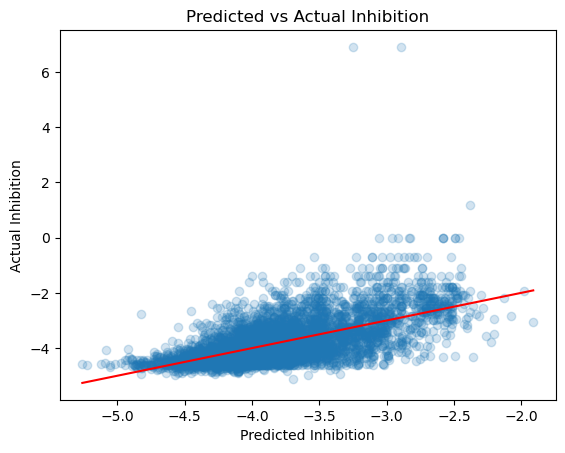

In [45]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr


y_predicted = model.predict(test[features])
y_expected = test['log_inhibition']


corr, p_value = pearsonr(y_expected, y_predicted)
print("Pearson Corr: ", corr, " p_value: ", p_value)
corr, p_value = spearmanr(y_expected, y_predicted)
print("Spearman Corr: ", corr, " p_value: ", p_value)
plt.scatter(y_predicted, y_expected, alpha=0.2)
# plt.scatter(y_test, test['gc_content'])
x = np.linspace(np.min(y_predicted), np.max(y_predicted), 100)
plt.plot(x, x, color='red')

plt.xlabel('Predicted Inhibition')
plt.ylabel('Actual Inhibition')
plt.title('Predicted vs Actual Inhibition')
plt.show()

In [46]:
from sklearn.model_selection import permutation_test_score

score, permutation_scores, pvalue = permutation_test_score(model, X, Y, cv=5, n_permutations=100, n_jobs=-1, scoring='r2')
print(score, permutation_scores, pvalue)

0.3837193338989153 [-0.00342219 -0.00319146 -0.0026008  -0.00305666 -0.00380357 -0.00312035
 -0.00236819 -0.00342009 -0.00337478 -0.00378493 -0.00479659 -0.00364624
 -0.00469123 -0.00473113 -0.0038624  -0.00435402 -0.00328971 -0.00340262
 -0.0042144  -0.00461775 -0.00541946 -0.00209035 -0.00219917 -0.00383114
 -0.00328021 -0.00235486 -0.00384146 -0.00212521 -0.00312269 -0.0019188
 -0.00105342 -0.00337674 -0.00294155 -0.00368373 -0.00375679 -0.00865688
 -0.00419952 -0.00242414 -0.00310832 -0.00406647 -0.00336563 -0.00236904
 -0.00411303 -0.0032164  -0.0032482  -0.00288879 -0.00373939 -0.00359454
 -0.00371133 -0.00458366 -0.00291408 -0.0044067  -0.00338564 -0.00347688
 -0.00399452 -0.0029545  -0.00318198 -0.00441796 -0.00135111 -0.00383103
 -0.00261357 -0.00322161 -0.00397879 -0.00396075 -0.00298496 -0.00459967
 -0.00249252 -0.00368177 -0.00382458 -0.0023943  -0.00280447 -0.00296808
 -0.00405963 -0.00384042 -0.00250151 -0.00352844 -0.00281447 -0.00392934
 -0.00247351 -0.00330492 -0.00277

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(filtered[features], filtered['log_inhibition'])

# Get the feature importances
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [48]:
for index, row in importance_df.iterrows():
    print(f"{row['Feature']:<40} {row['Importance']:.3}")

sense_start                              0.182
Treatment_Period(hours)                  0.129
ASO_volume(nM)                           0.091
log_volume                               0.0818
at_skew                                  0.0619
log_density                              0.056
ENC                                      0.0368
gc_skew                                  0.0357
Cell_line_A431                           0.028
dispersed_repeats_score                  0.0212
flexible_dinucleotide_fraction           0.0203
entropy                                  0.0202
dinucleotide_entropy                     0.0196
gc_skew_ends                             0.0194
Transfection_free uptake                 0.0153
purine_content                           0.0145
gc_block_length                          0.0138
hairpin_tm                               0.0128
hairpin_dG_energy                        0.0123
Modification_MOE/cEt/5-methylcytosines/deoxy 0.0119
tandem_repeats_score                     

In [49]:
# Evaluate the model's choice of features by leaving one out and calculating the score

cv = 5
scorer = spearman_scorer
jobs = -1
feature_importances = []


for feature in feature_base:
    score_without_feature = cross_val_score(model, X.drop(columns=[feature]), Y, cv=cv, scoring=scorer, n_jobs=jobs).mean()
    # print(f"Dropping {feature}: performance drop = {baseline_score - score_without_feature}")
    feature_importances.append((feature, float(baseline_score - score_without_feature)))

print("Done base features")

for i in range(len(one_hot_encoded_features)):
    feature_name = ONE_HOT_FEATURE_NAMES[i]
    feature = one_hot_encoded_features[i]

    score_without_feature = cross_val_score(model, X.drop(columns=feature), Y, cv=cv, scoring=scorer, n_jobs=jobs).mean()
    performance_diff = baseline_score - score_without_feature
    feature_importances.append((feature_name, float(performance_diff)))

sorted_data = sorted(feature_importances, key=lambda x: x[1], reverse=True)
for datum in sorted_data:
    print(datum)

print("The baseline is: ", baseline_score)
print("The spearman baseline is: ", spearman_score)

Done base features
('Cell_line', 0.13459449597316145)
('Transfection', 0.07640927225843008)
('sense_type', 0.0240221076051908)
('Modification', 0.01896480744017487)
('sense_length', 0.01231315241319969)
('sense_start', 0.010839667998673419)
The baseline is:  0.3837193338989153
The spearman baseline is:  0.37292462571945845
